---
title: PySpark Basics
author: Emily Peters
date: 2025-02-17
categories: [Python, Big Data, Spark]
---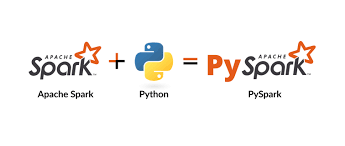

# Apache Hadoop
Hadoop provides storage and ways to easily process big data sets. Storage is managed by the Hadoop Distributed File System (HDFS), and the data is processed using MapReduce. <br>
- HDFS divides up data from multiple sources and distributes them across different servers to be processed.The computing environment is redundant, allowing the application to run if a server fails. <br>
- MapReduce distributes data across multiple machines and the brings the processed data back together so it's coherent.

Hadoop has its limits, however. Data cannot be processed in real time. It can only collect data for a certain period of time and then process it all at once. This process is called batch processing.

# Apache Spark
Spark is built for processing large amounts of data, as well as data analysis, machine learning, data visualization, and streaming real-time data. <br>
Spark starts with the driver node, which communicates to the cluser manager. The cluser manager to distributes tasks to different worker nodes. Worker nodes execute the task they were given, communicate with each other if needed, and send the results back to the driver node.<br>
Here are some other attribuutes of Spark:<br>
1. In-Memory Processing <br>
  - Loads data into memory once and performs all operations in-memory <br>
2. Data Reuse <br>
  - Data is cached so that it can be reused <br>
3. Faster Execution <br>
  - Allows for real-time processing <br>
  
Hadoop and Spark can be used together to store big data sets and quickly process data.

# PySpark
PySpark is an API that allows the use of Spark in Python.<br>
- PySpark can incorporate Pandas DataFrames and SQL tables.

PySpark has methods that make data transformation easy to complete, similar to Pandas. A Spark DataFrame has a few key differences:<br>
1. Data is distributed among different machines <br>
2. Operations are executed the same in each node <br>
3. Can process more data than one machine can handle <br>
4. Transformations are not computed until called to action (lazy evaluation) <br>
5. High fault tolerance; can function if a node is disabled and recovers lost data <br>
6. Built for extremely large amounts of data

## PySpark in Google Colab
PySpark is very similar to Pandas. It is very convenient to transform data just like we learned before, just with a slightly different syntax.<br>
Here are the basics of coding with PySpark: <br>

### Loading Data <br>
Every time you use PySpark, you must establish a `SparkSession` entry point. This allows you to transform DataFrames and SQL tables.

In [1]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

There are two ways to approach reading a CSV file. First, if the file is in your local directory, follow this syntax that is similar to Pandas:

In [ ]:
path = '/content/drive/MyDrive/lecture-data/cces.csv'
df = spark.read.csv(path,
                    inferSchema=True,
                    header=True)
df.show()

- Note: in order to see any display of a DataFrame at any point while you're working with it, you must use `.show()`. <br>

Second, if the file is from a URL, you have to create a Pandas DataFrame first. From there, you can convert the Pandas DataFrame into a Spark DataFrame.

In [56]:
import pandas as pd
df_pd = pd.read_csv('https://bcdanl.github.io/data/nba.csv')

df = spark.createDataFrame(df_pd)
df.show()

+---------------+--------------------+--------+--------+--------+
|           Name|                Team|Position|Birthday|  Salary|
+---------------+--------------------+--------+--------+--------+
|   Shake Milton|  Philadelphia 76ers|      SG| 9/26/96| 1445697|
| Christian Wood|     Detroit Pistons|      PF| 9/27/95| 1645357|
|  PJ Washington|   Charlotte Hornets|      PF| 8/23/98| 3831840|
|   Derrick Rose|     Detroit Pistons|      PG| 10/4/88| 7317074|
|  Marial Shayok|  Philadelphia 76ers|       G| 7/26/95|   79568|
| Draymond Green|Golden State Warr...|      PF|  3/4/90|18539130|
|  Kendrick Nunn|          Miami Heat|      SG|  8/3/95| 1416852|
|     Cedi Osman| Cleveland Cavaliers|      SF|  4/8/95| 2907143|
|    Brook Lopez|     Milwaukee Bucks|       C|  4/1/88|12093024|
|   Torrey Craig|      Denver Nuggets|      SF|12/19/90| 2000000|
|Jordan Clarkson| Cleveland Cavaliers|      PG|  6/7/92|13437500|
|    Alex Caruso|  Los Angeles Lakers|      PG| 2/28/94| 2750000|
|   Norvel

### Summarizing Data <br>
- `df.printSchema()` prints column names and data types <br>
  - the argument, nullable = True allows columns with a null value to print
- `df.columns` prints list of columns <br>
- `df.dtypes` returns a list of tuples containing the column name and data type <br>
- `df.count()` prints the total number of rows <br>
- `df.describe()` prints summary statistics for each column <br>

### Displaying Data <br>
- `df.show()`: default shows the first 20 rows <br>
  - arguments: <br>
  1. n = : number of rows to display <br>
  2. truncate = : either boolean value, or a number specifying how many characters to keep <br>
  3. vertical = : boolean value; if True, each row is displayed vertically <br>

### Selecting Columns <br>
Selecting one column:

In [6]:
df.select("Name").show(5)

+--------------+
|          Name|
+--------------+
|  Shake Milton|
|Christian Wood|
| PJ Washington|
|  Derrick Rose|
| Marial Shayok|
+--------------+
only showing top 5 rows



Selecting multiple columns:

In [7]:
df.select("Name", "Team", "Salary").show(5)

+--------------+------------------+-------+
|          Name|              Team| Salary|
+--------------+------------------+-------+
|  Shake Milton|Philadelphia 76ers|1445697|
|Christian Wood|   Detroit Pistons|1645357|
| PJ Washington| Charlotte Hornets|3831840|
|  Derrick Rose|   Detroit Pistons|7317074|
| Marial Shayok|Philadelphia 76ers|  79568|
+--------------+------------------+-------+
only showing top 5 rows



### Counting Methods <br>
Like previously mentioned, you can use `df.count()` for a count of the entire DataFrame. You can also count specific columns. Here are two ways to do this: <br>

In [8]:
from pyspark.sql.functions import countDistinct
num_teams = df.select(countDistinct("Team")).collect()[0][0]
num_teams

30

This code shows the number of observations of the unique values in the Team column.

In [10]:
df.groupBy("Team").count().show(5)

+--------------------+-----+
|                Team|count|
+--------------------+-----+
|        Phoenix Suns|   15|
|      Boston Celtics|   16|
|    Dallas Mavericks|   13|
|New Orleans Pelicans|   16|
|       Brooklyn Nets|   17|
+--------------------+-----+
only showing top 5 rows



This code shows how many times each unique value in Team occurrs. <br>

### Sorting <br>
- `df.orderBy()` sorts values by a variable given. It can be given ascending/descending intstructions. Sorting by multiple columns requires the use of a list.

In [11]:
df.orderBy("Name").show(5)

+-----------------+--------------------+--------+--------+--------+
|             Name|                Team|Position|Birthday|  Salary|
+-----------------+--------------------+--------+--------+--------+
|     Aaron Gordon|       Orlando Magic|      PF| 9/16/95|19863636|
|    Aaron Holiday|      Indiana Pacers|      PG| 9/30/96| 2239200|
|      Abdel Nader|Oklahoma City Thu...|      SF| 9/25/93| 1618520|
|      Adam Mokoka|       Chicago Bulls|       G| 7/18/98|   79568|
|Admiral Schofield|  Washington Wizards|      SF| 3/30/97| 1000000|
+-----------------+--------------------+--------+--------+--------+
only showing top 5 rows



The default sorting is ascending.

In [12]:
from pyspark.sql.functions import desc
df.orderBy(desc("Salary")).show(5)

+-----------------+--------------------+--------+--------+--------+
|             Name|                Team|Position|Birthday|  Salary|
+-----------------+--------------------+--------+--------+--------+
|    Stephen Curry|Golden State Warr...|      PG| 3/14/88|40231758|
|Russell Westbrook|     Houston Rockets|      PG|11/12/88|38506482|
|       Chris Paul|Oklahoma City Thu...|      PG|  5/6/85|38506482|
|        John Wall|  Washington Wizards|      PG|  9/6/90|38199000|
|     James Harden|     Houston Rockets|      PG| 8/26/89|38199000|
+-----------------+--------------------+--------+--------+--------+
only showing top 5 rows



In [13]:
df.orderBy(["Team", desc("Salary")]).show(5)

+----------------+-------------+--------+--------+--------+
|            Name|         Team|Position|Birthday|  Salary|
+----------------+-------------+--------+--------+--------+
|Chandler Parsons|Atlanta Hawks|      SF|10/25/88|25102512|
|     Evan Turner|Atlanta Hawks|      PG|10/27/88|18606556|
|    Allen Crabbe|Atlanta Hawks|      SG|  4/9/92|18500000|
| De'Andre Hunter|Atlanta Hawks|      SF| 12/2/97| 7068360|
|   Jabari Parker|Atlanta Hawks|      PF| 3/15/95| 6500000|
+----------------+-------------+--------+--------+--------+
only showing top 5 rows



- `nsmallest` and `nlargest` are not functions in PySpark, but there is an equivalent way to do it:

In [ ]:
# nsmallest example:
df.orderBy("Salary").limit(5).show()

# nlargest example:
df.orderBy(desc("Salary")).limit(5).show()

### Row-Based Access <br>
PySpark does not use row indexing, so you have to use other ways to access rows: <br>
1. `df.limit()` or `df.take()` takes an integer and returns a list of the number of rows <br>
2. `df.collect()` returns all the reconds as a list of rows <br>
Here is an example:

In [16]:
df.filter("Team == 'New York Knicks'").show()
df.limit(5).show()
df.take(5)
df.collect()

+-----------------+---------------+--------+--------+--------+
|             Name|           Team|Position|Birthday|  Salary|
+-----------------+---------------+--------+--------+--------+
|    Marcus Morris|New York Knicks|      PF|  9/2/89|15000000|
|   Damyean Dotson|New York Knicks|      SG|  5/6/94| 1618520|
| Ignas Brazdeikis|New York Knicks|      SF|  1/8/99|  898310|
|        Ivan Rabb|New York Knicks|      PF|  2/4/97|   79568|
|       Kevin Knox|New York Knicks|      PF| 8/11/99| 4380120|
|    Julius Randle|New York Knicks|       C|11/29/94|18000000|
|Mitchell Robinson|New York Knicks|       C|  4/1/98| 1559712|
|  Wayne Ellington|New York Knicks|      SG|11/29/87| 8000000|
|       RJ Barrett|New York Knicks|      SG| 6/14/00| 7839960|
|    Elfrid Payton|New York Knicks|      PG| 2/22/94| 8000000|
|    Allonzo Trier|New York Knicks|      PG| 1/17/96| 3551100|
|   Reggie Bullock|New York Knicks|      SF| 3/16/91| 4000000|
|     Bobby Portis|New York Knicks|       C| 2/10/95|15

[Row(Name='Shake Milton', Team='Philadelphia 76ers', Position='SG', Birthday='9/26/96', Salary=1445697),
 Row(Name='Christian Wood', Team='Detroit Pistons', Position='PF', Birthday='9/27/95', Salary=1645357),
 Row(Name='PJ Washington', Team='Charlotte Hornets', Position='PF', Birthday='8/23/98', Salary=3831840),
 Row(Name='Derrick Rose', Team='Detroit Pistons', Position='PG', Birthday='10/4/88', Salary=7317074),
 Row(Name='Marial Shayok', Team='Philadelphia 76ers', Position='G', Birthday='7/26/95', Salary=79568),
 Row(Name='Draymond Green', Team='Golden State Warriors', Position='PF', Birthday='3/4/90', Salary=18539130),
 Row(Name='Kendrick Nunn', Team='Miami Heat', Position='SG', Birthday='8/3/95', Salary=1416852),
 Row(Name='Cedi Osman', Team='Cleveland Cavaliers', Position='SF', Birthday='4/8/95', Salary=2907143),
 Row(Name='Brook Lopez', Team='Milwaukee Bucks', Position='C', Birthday='4/1/88', Salary=12093024),
 Row(Name='Torrey Craig', Team='Denver Nuggets', Position='SF', Birthda

### Changing Variables <br>
1. Adding Columns <br>
`df.withColumn()` takes the new name, along with how you'd like to create the new column. When using an already existing column, you must specify that it is a column by using `col('ColumnName')`. <br>
- Note: you need to import `col()` in order for it to be recognized. <br>

Example: Dividing the NBA salaries by 1000

In [24]:
from pyspark.sql.functions import col
df = df.withColumn("SalaryK", col("Salary")/1000)

+--------------+------------------+--------+--------+-------+--------+
|          Name|              Team|Position|Birthday| Salary| SalaryK|
+--------------+------------------+--------+--------+-------+--------+
|  Shake Milton|Philadelphia 76ers|      SG| 9/26/96|1445697|1445.697|
|Christian Wood|   Detroit Pistons|      PF| 9/27/95|1645357|1645.357|
| PJ Washington| Charlotte Hornets|      PF| 8/23/98|3831840| 3831.84|
|  Derrick Rose|   Detroit Pistons|      PG| 10/4/88|7317074|7317.074|
| Marial Shayok|Philadelphia 76ers|       G| 7/26/95|  79568|  79.568|
+--------------+------------------+--------+--------+-------+--------+
only showing top 5 rows



2. Removing Columns <br>
`df.drop()` takes one or multiple column names. <br>
Example: Removing 'SalaryK'

In [28]:
df = df.drop("SalaryK").show(5)

+--------------+------------------+--------+--------+-------+
|          Name|              Team|Position|Birthday| Salary|
+--------------+------------------+--------+--------+-------+
|  Shake Milton|Philadelphia 76ers|      SG| 9/26/96|1445697|
|Christian Wood|   Detroit Pistons|      PF| 9/27/95|1645357|
| PJ Washington| Charlotte Hornets|      PF| 8/23/98|3831840|
|  Derrick Rose|   Detroit Pistons|      PG| 10/4/88|7317074|
| Marial Shayok|Philadelphia 76ers|       G| 7/26/95|  79568|
+--------------+------------------+--------+--------+-------+
only showing top 5 rows



3. Renaming Columns <br>
`df.withColumnRenamed()` takes the current column name, followed by the new name
Example: Changing 'Birthday' to 'DateOfBirth'

In [32]:
df = df.withColumnRenamed("Birthday", "DateOfBirth").show(5)

+--------------+------------------+--------+-----------+-------+
|          Name|              Team|Position|DateOfBirth| Salary|
+--------------+------------------+--------+-----------+-------+
|  Shake Milton|Philadelphia 76ers|      SG|    9/26/96|1445697|
|Christian Wood|   Detroit Pistons|      PF|    9/27/95|1645357|
| PJ Washington| Charlotte Hornets|      PF|    8/23/98|3831840|
|  Derrick Rose|   Detroit Pistons|      PG|    10/4/88|7317074|
| Marial Shayok|Philadelphia 76ers|       G|    7/26/95|  79568|
+--------------+------------------+--------+-----------+-------+
only showing top 5 rows



4. Rearranging Columns
Use `select()` to order the columns in the way that you would like. <br>
Example:

In [40]:
df = df.select("Name", "Team", "Position", "Salary").show(5)

+--------------+------------------+--------+-------+
|          Name|              Team|Position| Salary|
+--------------+------------------+--------+-------+
|  Shake Milton|Philadelphia 76ers|      SG|1445697|
|Christian Wood|   Detroit Pistons|      PF|1645357|
| PJ Washington| Charlotte Hornets|      PF|3831840|
|  Derrick Rose|   Detroit Pistons|      PG|7317074|
| Marial Shayok|Philadelphia 76ers|       G|  79568|
+--------------+------------------+--------+-------+
only showing top 5 rows



### Mathematical & Vectorized Operations <br>
1. Aggregate Functions: <br>
- `mean()` <br>
- `min()` <br>
- `max()` <br>
- `stdev_pop()` <br>
- `median()` <br>
These functions are used within `selectExpr()`. They take the name of the variable you'd like to aggregate, and then add as "new_variable_name" after. <br>
Here are the aggregation functions in action:

In [43]:
df.selectExpr(
    "mean(Salary) as mean_salary",
    "min(Salary) as min_salary",
    "max(Salary) as max_salary",
    "stddev_pop(Salary) as std_salary"
).show()

+-----------------+----------+----------+-----------------+
|      mean_salary|min_salary|max_salary|       std_salary|
+-----------------+----------+----------+-----------------+
|7653583.764444444|     79568|  40231758|9278483.657952718|
+-----------------+----------+----------+-----------------+



1. Using the `functions` package

In [44]:
from pyspark.sql import functions as F

This package will allow you to create new columns or transform current ones. <br>
Examples: <br>
- `F.avg()` <br>
- `F.concat()` <br>
- `F.lit()` <br>
- `F.col()` <br>

Here are these fucntions in action:

In [47]:
salary_mean = df.select(F.avg("Salary").alias("mean_salary")).collect()[0]["mean_salary"]

df2 = (
    df
    .withColumn("Salary_2x", F.col("Salary") * 2)    # Add Salary_2x
    .withColumn(
        "Name_w_Position",           # Concatenate Name and Position
        F.concat(F.col("Name"), F.lit(" ("), F.col("Position"), F.lit(")")))
    .withColumn(
        "Salary_minus_Mean",        # Subtract mean salary
        F.col("Salary") - F.lit(salary_mean))
).show(5)

+--------------+------------------+--------+--------+-------+---------+-------------------+-------------------+
|          Name|              Team|Position|Birthday| Salary|Salary_2x|    Name_w_Position|  Salary_minus_Mean|
+--------------+------------------+--------+--------+-------+---------+-------------------+-------------------+
|  Shake Milton|Philadelphia 76ers|      SG| 9/26/96|1445697|  2891394|  Shake Milton (SG)| -6207886.764444444|
|Christian Wood|   Detroit Pistons|      PF| 9/27/95|1645357|  3290714|Christian Wood (PF)| -6008226.764444444|
| PJ Washington| Charlotte Hornets|      PF| 8/23/98|3831840|  7663680| PJ Washington (PF)|-3821743.7644444443|
|  Derrick Rose|   Detroit Pistons|      PG| 10/4/88|7317074| 14634148|  Derrick Rose (PG)| -336509.7644444443|
| Marial Shayok|Philadelphia 76ers|       G| 7/26/95|  79568|   159136|  Marial Shayok (G)| -7574015.764444444|
+--------------+------------------+--------+--------+-------+---------+-------------------+-------------

### Converting Data Types <br>
1. `.cast()` is used after a variable is specified, and takes different data types as a string. <br>
2. `to_date()` converts data to a specified date format. It takes the variable to be changed, and the specific date format you wish to chose.<br>

In [49]:
from pyspark.sql.functions import to_date

df = df.withColumn('DateOfBirth_ts', to_date('Birthday','M/d/yy')).show(5)

+--------------+------------------+--------+--------+-------+--------------+
|          Name|              Team|Position|Birthday| Salary|DateOfBirth_ts|
+--------------+------------------+--------+--------+-------+--------------+
|  Shake Milton|Philadelphia 76ers|      SG| 9/26/96|1445697|    2096-09-26|
|Christian Wood|   Detroit Pistons|      PF| 9/27/95|1645357|    2095-09-27|
| PJ Washington| Charlotte Hornets|      PF| 8/23/98|3831840|    2098-08-23|
|  Derrick Rose|   Detroit Pistons|      PG| 10/4/88|7317074|    2088-10-04|
| Marial Shayok|Philadelphia 76ers|       G| 7/26/95|  79568|    2095-07-26|
+--------------+------------------+--------+--------+-------+--------------+
only showing top 5 rows



Main Data Types: <br>
- `int` <br>
- `float` <br>
- `string` <br>
- `boolean` <br>
- `date` <br>
- `timestamp` <br>

### Filtering by a Condition <br>
`df.filter()` takes one or multiple conditions to be met and displayed. Separate conditions by putting each one in parentheses and with the & or | sign. <br>
Here are some examples with a new DataFrame:

In [59]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
df_pd = pd.read_csv("https://bcdanl.github.io/data/employment.csv")
df_pd = df_pd.where(pd.notnull(df_pd), None)  # Convert NaN to None
df = spark.createDataFrame(df_pd)

In [61]:
df.filter(col("Salary") > 100000).show(5)

+----------+------+----------+--------+-----+---------+
|First Name|Gender|Start Date|  Salary| Mgmt|     Team|
+----------+------+----------+--------+-----+---------+
|   Douglas|  Male|    8/6/93|     NaN| true|Marketing|
|     Maria|Female|      NULL|130590.0|false|  Finance|
|     Jerry|  NULL|    3/4/05|138705.0| true|  Finance|
|     Larry|  Male|   1/24/98|101004.0| true|       IT|
|    Dennis|  Male|   4/18/87|115163.0|false|    Legal|
+----------+------+----------+--------+-----+---------+
only showing top 5 rows



In [62]:
#or

df.filter(
    ( col("Team") == "Finance" ) &
    ( col("Salary") >= 100000 )
).show(5)

+----------+------+----------+--------+-----+-------+
|First Name|Gender|Start Date|  Salary| Mgmt|   Team|
+----------+------+----------+--------+-----+-------+
|     Maria|Female|      NULL|130590.0|false|Finance|
|     Jerry|  NULL|    3/4/05|138705.0| true|Finance|
|     Bruce|  Male|  11/28/09|114796.0|false|Finance|
|      Carl|  Male|    5/3/06|130276.0| true|Finance|
|     Irene|  NULL|   7/14/15|100863.0| true|Finance|
+----------+------+----------+--------+-----+-------+
only showing top 5 rows



In [63]:
#or

df.filter(
    (col("Team") == "Finance") |
    (col("Team") == "Legal")   |
    (col("Team") == "Sales")
).show(5)

+----------+------+----------+--------+-----+-------+
|First Name|Gender|Start Date|  Salary| Mgmt|   Team|
+----------+------+----------+--------+-----+-------+
|     Maria|Female|      NULL|130590.0|false|Finance|
|     Jerry|  NULL|    3/4/05|138705.0| true|Finance|
|    Dennis|  Male|   4/18/87|115163.0|false|  Legal|
|      NULL|Female|   7/20/15| 45906.0| NULL|Finance|
|     Julie|Female|  10/26/97|102508.0| true|  Legal|
+----------+------+----------+--------+-----+-------+
only showing top 5 rows



`isin()` used within `filter()`, takes a list of values within a variable and filters only those values.

In [65]:
df.filter(col('Team').isin('Finance','Legal','Sales')).show(5)

+----------+------+----------+--------+-----+-------+
|First Name|Gender|Start Date|  Salary| Mgmt|   Team|
+----------+------+----------+--------+-----+-------+
|     Maria|Female|      NULL|130590.0|false|Finance|
|     Jerry|  NULL|    3/4/05|138705.0| true|Finance|
|    Dennis|  Male|   4/18/87|115163.0|false|  Legal|
|      NULL|Female|   7/20/15| 45906.0| NULL|Finance|
|     Julie|Female|  10/26/97|102508.0| true|  Legal|
+----------+------+----------+--------+-----+-------+
only showing top 5 rows



`between()` is also used within `filter()`. It takes a range of values and returns True if a value falls wihin the range.

In [66]:
df_between = df.filter(col('Salary').between(90000,100000))
df_between.show(5)

+----------+------+----------+-------+-----+-----------+
|First Name|Gender|Start Date| Salary| Mgmt|       Team|
+----------+------+----------+-------+-----+-----------+
|    Angela|Female|  11/22/05|95570.0| true|Engineering|
|    Jeremy|  Male|   9/21/10|90370.0|false|         HR|
|    Joshua|  NULL|    3/8/12|90816.0| true|         IT|
|      John|  Male|    7/1/92|97950.0|false|         IT|
|     Jerry|  Male|   1/10/04|95734.0|false|         IT|
+----------+------+----------+-------+-----+-----------+
only showing top 5 rows



### Missing Values
Find how many missing values are in a column with `isNull()`:

In [67]:
df.filter(col('Team').isNull()).count()

44

You can find how many non-null values by using the same code and replacing `isNull()` with `isNotNull()`. <br>

Drop rows with missing values with `na.drop()`:

In [73]:
df_drop = df.na.drop().show(10)

+----------+------+----------+--------+-----+------------+
|First Name|Gender|Start Date|  Salary| Mgmt|        Team|
+----------+------+----------+--------+-----+------------+
|     Larry|  Male|   1/24/98|101004.0| true|          IT|
|    Dennis|  Male|   4/18/87|115163.0|false|       Legal|
|      Ruby|Female|   8/17/87| 65476.0| true|     Product|
|    Angela|Female|  11/22/05| 95570.0| true| Engineering|
|   Frances|Female|    8/8/02|139852.0| true|Business Dev|
|     Julie|Female|  10/26/97|102508.0| true|       Legal|
|   Brandon|  Male|   12/1/80|112807.0| true|          HR|
|      Gary|  Male|   1/27/08|109831.0|false|       Sales|
|  Kimberly|Female|   1/14/99| 41426.0| true|     Finance|
|   Lillian|Female|    6/5/16| 59414.0|false|     Product|
+----------+------+----------+--------+-----+------------+
only showing top 10 rows



- takes the argument `how = 'all'`, which removes observations that all values are missing <br>
- use the argument `subset = ` to target rows with missing values in a given variable <br>

In [71]:
df_drop_subset = df.na.drop(subset=["Gender", "Team"]).show(10)

+----------+------+----------+--------+-----+------------+
|First Name|Gender|Start Date|  Salary| Mgmt|        Team|
+----------+------+----------+--------+-----+------------+
|   Douglas|  Male|    8/6/93|     NaN| true|   Marketing|
|     Maria|Female|      NULL|130590.0|false|     Finance|
|     Larry|  Male|   1/24/98|101004.0| true|          IT|
|    Dennis|  Male|   4/18/87|115163.0|false|       Legal|
|      Ruby|Female|   8/17/87| 65476.0| true|     Product|
|      NULL|Female|   7/20/15| 45906.0| NULL|     Finance|
|    Angela|Female|  11/22/05| 95570.0| true| Engineering|
|   Frances|Female|    8/8/02|139852.0| true|Business Dev|
|     Julie|Female|  10/26/97|102508.0| true|       Legal|
|   Brandon|  Male|   12/1/80|112807.0| true|          HR|
+----------+------+----------+--------+-----+------------+
only showing top 10 rows



`na.fill()` fills in null values with a specified value.

In [72]:
df_fill = df.na.fill(value = 0, subset = ["Salary"]).show(10)

+----------+------+----------+--------+-----+------------+
|First Name|Gender|Start Date|  Salary| Mgmt|        Team|
+----------+------+----------+--------+-----+------------+
|   Douglas|  Male|    8/6/93|     0.0| true|   Marketing|
|    Thomas|  Male|   3/31/96| 61933.0| true|        NULL|
|     Maria|Female|      NULL|130590.0|false|     Finance|
|     Jerry|  NULL|    3/4/05|138705.0| true|     Finance|
|     Larry|  Male|   1/24/98|101004.0| true|          IT|
|    Dennis|  Male|   4/18/87|115163.0|false|       Legal|
|      Ruby|Female|   8/17/87| 65476.0| true|     Product|
|      NULL|Female|   7/20/15| 45906.0| NULL|     Finance|
|    Angela|Female|  11/22/05| 95570.0| true| Engineering|
|   Frances|Female|    8/8/02|139852.0| true|Business Dev|
+----------+------+----------+--------+-----+------------+
only showing top 10 rows



 - you can do multiple variables at a time by usingn a dictionary instead of `value = , subset = `

### Dealing with Duplicates
`dropDuplicates()` drops all rows that are exact duplicates

In [74]:
df_no_dups = df.dropDuplicates()

  - add `['Variable_Name']` in the function to specify how to drop duplicates

In [75]:
df_no_dups_subset = df.dropDuplicates(["Team"])

Now you're all caught up on the PySpark basics!